In [22]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

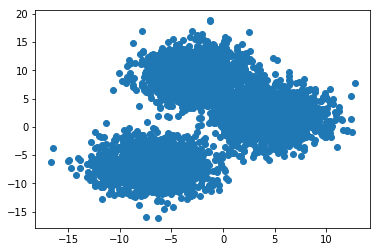

In [23]:
# number of samples; change the data generation if you want

X, y = make_blobs(n_samples = 5000, cluster_std=2.5,
                  random_state = 42)
# get the first impression of the data distribution
plt.scatter(X[:,0], X[:,1])

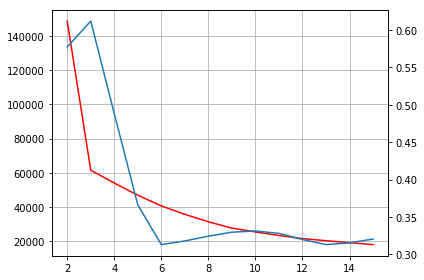

In [24]:
# Find the best k, here, the one with minimum sum of squared distances between each datapoint to its nearest centroid
# You can get the sum of squared distances with 'kmeans.inertia_'

sum_squaredDistances=[]
silhouette=[]
k_best = range(2,16)
for i in k_best:
    kmeans = KMeans(n_clusters=i, random_state = 0)
    kmeans.fit(X)
    sum_squaredDistances.append(kmeans.inertia_)
    silhouette.append(metrics.silhouette_score(X, kmeans.labels_))
    
fig, px1 = plt.subplots()

# Plot the range of k_best against the sum of squared distances; you should see an elbow-like curve
px1.plot(k_best, sum_squaredDistances, "r")

# Plot the range of k_best against the silhouette coefficient
px2 = px1.twinx()
px2.plot(k_best, silhouette)

fig.tight_layout()

px1.grid(True)
plt.show()
